In [1]:
import numpy as np
from scipy.stats import chi2
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [2]:
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week8/week8.md
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week8/file.txt
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week8/compilation.txt

--2023-10-19 18:51:10--  https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week8/week8.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3563 (3.5K) [text/plain]
Saving to: ‘week8.md’

week8.md            100%[===================>]   3.48K  --.-KB/s    in 0s      

2023-10-19 18:51:10 (82.5 MB/s) - ‘week8.md’ saved [3563/3563]

--2023-10-19 18:51:10--  https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week8/file.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected

## Problem 1
 1. Given 2 different models compute the p value for both model fits.
 3. Which model is consistant with a one and three sigma confidence limit?

In [3]:
#we know if model has no free parameters v = N where v is dof, N is data points
# v= N - p where v is degrees of freedom, N is number of data points, and p is free parameters

#function for dof and p-value
def calc_dof_and_prob(N, p, x_square):
    v = N - p  # dof
    p_value = 1 - chi2.cdf(x_square, v)  # cdf
    return v, p_value

#set sigma confidence levels
confidence_1_sigma = 1 - 0.683
confidence_3_sigma = 1 - 0.997

#model 1
N_1, p_1, x_square_1 = 115, 2, 127
v_1, p_value_1 = calc_dof_and_prob(N_1, p_1, x_square_1)
print(f'model 1 has : {v_1} degrees of freedom')
print(f'model 1 p-value: {p_value_1:.3f}')
print(f'model 1 consistent at 1-sigma: {p_value_1 > confidence_1_sigma}')
print(f'model 1 consistent at 3-sigma: {p_value_1 > confidence_3_sigma}')

#model 2
N_2, p_2, x_square_2 = 15, 1, 26
v_2, p_value_2 = calc_dof_and_prob(N_2, p_2, x_square_2)
print(f'model 2 has : {v_2} degrees of freedom')
print(f'model 2 p-value: {p_value_2 : .3f}')
print(f'model 2 consistent at 1-sigma: {p_value_2 > confidence_1_sigma}')
print(f'model 2 consistent at 3-sigma: {p_value_2 > confidence_3_sigma}')

model 1 has : 113 degrees of freedom
model 1 p-value: 0.174
model 1 consistent at 1-sigma: False
model 1 consistent at 3-sigma: True
model 2 has : 14 degrees of freedom
model 2 p-value:  0.026
model 2 consistent at 1-sigma: False
model 2 consistent at 3-sigma: True


###Consistancy Analysis: P1

### Model 1
- **DOF**: 113  
  - Many more points compared to Model 2.
    
- **p-value**: 0.174  
  - About a 17% chance the data fits the model by random luck.
  
- **Consistency**:
  - Fails at 1-sigma but passes at 3-sigma.  
  - Not convincing at lower confidence limit, but at a high confidence limit (3-sigma) it fits well.

### Model 2
- **DOF**: 14  
  - Less data points than model 1.
  
- **p-value**: 0.026  
  - Only a 2.6% chance the data fits by random luck.
  
- **Consistency**:
  - Also fails at 1-sigma but passes at 3-sigma.  
  - Not convincing at lower confidence, but solid at 3-sigma.

### Summary
Both models aren't convincing at the 1-sigma level but they are solid at the 3-sigma level. Model 1 has a better p-value, making it slightly more trustworthy.

#Problem 2

###We can assume M is one, we can count N and we can record the reduced chi**2 values
##P value can be found using cdf once we have normal chi**2

In [4]:
# Constants
M = 1 #assumed free params
N = 5 + 6 + 5 #total data points from each of the three discontinous plots

#reduced chi**2 for each star
chi_r = {
    'SIMP J1118': [1.904],
    'SIMP J0956': [0.893],
    'SIMP J1200': [2.499]
}

#normal chi-squared for each star
chi_squared = {}
p_values = {}


#to find chi**2 x^2 = x^2_reduced (N-M)
#to find P chi2.cdf(chi,v)

#iterate through each star
for star, reduced_chi_values in chi_r.items():
    chi_squared[star] = [x * (N - M) for x in reduced_chi_values]
    p_values[star] = [1 - chi2.cdf(chi, N - M) for chi in chi_squared[star]]

#show chi-squared values
print('Chi-squared values:', chi_squared)

#show p-values
print('P-values:', p_values)

#format print
print('\n')
print('Star      | Reduced Chi | Chi       | P-value')
print('----------|-------------|-----------|---------')

#loop thru dict
for star in chi_r.keys():
    for r_chi, chi, p in zip(chi_r[star], chi_squared[star], p_values[star]):
        print(f'{star:10} | {r_chi:11.2f} | {chi:9.2f} | {p:.3f}')


Chi-squared values: {'SIMP J1118': [28.56], 'SIMP J0956': [13.395], 'SIMP J1200': [37.485]}
P-values: {'SIMP J1118': [0.01831523793786982], 'SIMP J0956': [0.5718169359600613], 'SIMP J1200': [0.0010745442529362936]}


Star      | Reduced Chi | Chi       | P-value
----------|-------------|-----------|---------
SIMP J1118 |        1.90 |     28.56 | 0.018
SIMP J0956 |        0.89 |     13.39 | 0.572
SIMP J1200 |        2.50 |     37.48 | 0.001


#Problem 3

In [5]:
#below you will find an altered version of your tpenalty function
#in the function call lower in the cell I will pass it the updated lamda/D value
#I have changed res_el by a factor of 1/2 since the problem statement
#says that it only uses half the field of view.
def tpenalty(sep=2,sigma=5,source=True):


 from scipy.stats import t
 from scipy.stats import norm

#change spatial resolution by factor of 1/2
#2(pi)*sep
 #res_el=2*np.pi*sep #if full view avaliable
 res_el = np.pi*sep


#Table 1/Figure 6 entries
 if source:

  ss_corr=np.sqrt(1+1/(res_el))
  penalty = t.ppf(norm.cdf(sigma),res_el-2)*ss_corr/sigma

 else:

  ss_corr=np.sqrt(1+1/res_el)
  penalty = t.ppf(norm.cdf(sigma),res_el-1)*ss_corr/sigma

 print('penalty is ',penalty)
 return penalty



In [6]:
#call tpenalty with new params
penalty_value = tpenalty(sep=2.5, sigma=5, source=False)
print('The contrast penalty at a distance of 2.5 λ/D is:', penalty_value)
#note the value is linear at half the field of view penatly is 2*og


penalty is  3.748846693460414
The contrast penalty at a distance of 2.5 λ/D is: 3.748846693460414


#Problem 4:


the data looks like: 

[0.   0.84]
[1.   3.29]
[ 2.   20.14]
[3.   8.28]
[4.   7.17]
[5.   6.78]
[ 6.   15.96]


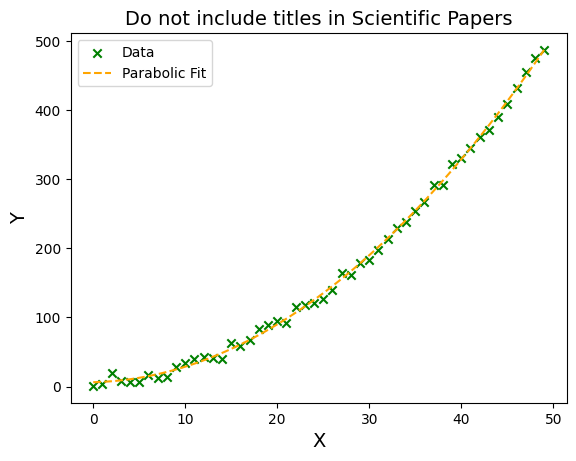

In [7]:
#read the data
data = np.loadtxt('file.txt')
#extract x,y
x_data, y_data = data[:, 0], data[:, 1]

print('the data looks like: \n')
for row in data[:7]:
    print(row)
#now that i've seen it i suspect its poly of degree 2 w/ noise

#func for parabola
def parabolic(x, a, b, c):
    return a * x**2 + b * x + c

#curve fit - scipy
params, _ = curve_fit(parabolic, x_data, y_data)

# og data plot
plt.scatter(x_data, y_data, marker='x', color='g', label='Data')

#parabolic function
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_parabolic = parabolic(x_fit, *params)
plt.plot(x_fit, y_fit_parabolic, '--', color='orange', label='Parabolic Fit')

#axis labels
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title("Do not include titles in Scientific Papers", fontsize=14)

#ledgend and export to vectorized figure
plt.legend()
plt.savefig('problem_4.pdf', format='PDF')
plt.show()

## Problem 5

In [8]:
###LOOP THIS BEFORE YOU TURN IN THIS IS GROSS

#read in data
data = np.genfromtxt('compilation.txt', delimiter='', dtype=str)

#extract columns we want

# jmag and jmag error
jmag = data[:, 27].astype(float)  # j magnitude
ejmag = data[:, 28].astype(float)  # error j magnitude

# hmag and hmag error
hmag = data[:, 30].astype(float)
ehmag = data[:, 31].astype(float)

# parallax and parallax error
plx = data[:, 8].astype(float)  # parallax
eplx = data[:, 9].astype(float)

#flag
flag = data[:,4]

#filtering based on given conditions

lowg_indices = np.where(

    (flag == 'lowg') | (flag == 'young') | (flag == 'lowg,young') |

    (flag == 'ABDor,lowg,young') | (flag == 'Argus,lowg,young') | (flag == 'Columba,lowg,young') |

    (flag == 'TWA,lowg,young') | (flag == 'ScoCen,young') | (flag == 'TucHor,young') |

    (flag == 'Tuc-Hor,lowg,young') | (flag == 'plx-discrep,lowg'))


#subsample filtered vales
filtered_jmag = jmag[lowg_indices]
filtered_ejmag = ejmag[lowg_indices]
filtered_hmag = hmag[lowg_indices]
filtered_ehmag = ehmag[lowg_indices]
filtered_plx = plx[lowg_indices]
filtered_eplx = eplx[lowg_indices]

In [83]:
#calculations
#start simple with no error prop
jmag_hmag_diff = jmag - hmag
filtered_jmag_hmag_diff = filtered_jmag - filtered_hmag

#simple abs mag no error prop
abs_jmag = jmag - 5 * np.log10(1e2 / plx)
filtered_abs_jmag = filtered_jmag - 5 * np.log10(1e2 / filtered_plx)

##error prop


#error propagation for jmag - hmag (x)
jmag_hmag_diff_err = np.sqrt(ejmag**2 + ehmag**2)
filtered_jmag_hmag_diff_err = np.sqrt(filtered_ejmag**2 + filtered_ehmag**2)

# Error propagation for abs_jmag (y)

abs_jmag_err = np.sqrt(ejmag**2 + (5 * eplx / plx * (1 / np.log(10)))**2)
filtered_abs_jmag_err = np.sqrt(filtered_ejmag**2 + (5 * filtered_eplx / filtered_plx * (1 / np.log(10)))**2)
"""
# Error propagation for abs_jmag (y)
abs_jmag_err = np.sqrt(ejmag**2 + (5 * eplx / (np.log(10) * plx))**2)
filtered_abs_jmag_err = np.sqrt(filtered_ejmag**2 + (5 * filtered_eplx / (np.log(10) * filtered_plx))**2)
"""



'\n# Error propagation for abs_jmag (y)\nabs_jmag_err = np.sqrt(ejmag**2 + (5 * eplx / (np.log(10) * plx))**2)\nfiltered_abs_jmag_err = np.sqrt(filtered_ejmag**2 + (5 * filtered_eplx / (np.log(10) * filtered_plx))**2)\n'

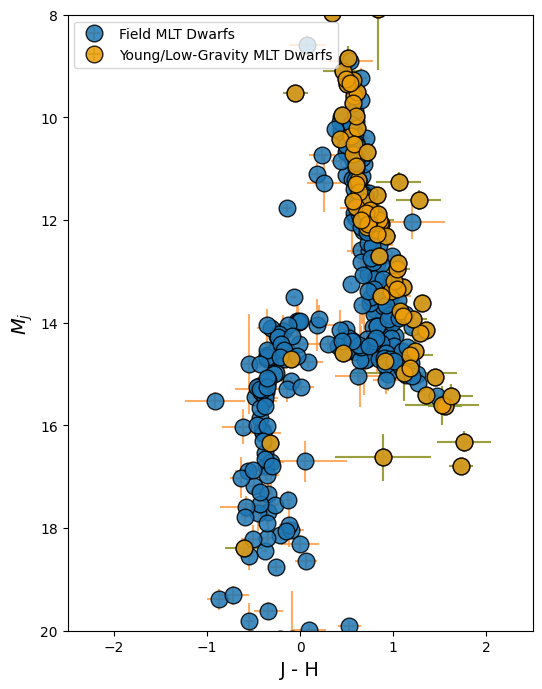

In [97]:
##Resource Used for Color: https://imagecolorpicker.com/en
#I couldn't find a default 'Blue' etc that fit right!

#tuneable params
a = .85 #alpha
mcf = '#1e77b4'  #full marker color
mecf = 'black'  #full marker edge color
mcfilt = '#ec9e09'  #filtered marker color
mecfilt = 'black'  #filtered marker edge color
ecf = '#ff9e4a'  #full error color
ecfilt = '#889f39'  #filtered error color
ms = 12  #marker size
afs = 14  #axis font size
lfs = 10  #legend font size

#fig axes call
fig, ax = plt.subplots(figsize=(6, 8))

#full dataset plot w/ params
ax.errorbar(jmag_hmag_diff, abs_jmag, xerr=jmag_hmag_diff_err, yerr=abs_jmag_err, fmt='o', c=mcf, markeredgecolor=mecf, ecolor=ecf, alpha=a, label='Field MLT Dwarfs', markersize=ms)

#filtered dataset w/ params
ax.errorbar(filtered_jmag_hmag_diff, filtered_abs_jmag, xerr=filtered_jmag_hmag_diff_err, yerr=filtered_abs_jmag_err, fmt='o', c=mcfilt, markeredgecolor=mecfilt, ecolor=ecfilt, alpha=a, label='Young/Low-Gravity MLT Dwarfs', markersize=ms)

#axes and ledgend
ax.set_xlabel('J - H', fontsize=afs)
ax.set_ylabel(r'$M_j$', fontsize=afs)
ax.legend(loc='upper left', fontsize=lfs)

#limits
ax.set_ylim(20, 8) #invert
ax.set_xlim(-2.5, 2.5)

#show
plt.savefig('question5.pdf',format='pdf')
plt.show()
